In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt

In [0]:
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [0]:
from xgboost              import XGBClassifier
from sklearn.ensemble     import ExtraTreesClassifier
from sklearn.tree         import ExtraTreeClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm             import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [0]:
pd.set_option('use_inf_as_na', True)

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TextAnalytics/features_multi_classification.csv')

In [127]:
dataset.head()

,ArticleId:start:stop,Happiness,HarmVirtue,HarmVice,FairnessVirtue,FairnessVice,IngroupVirtue,IngroupVice,AuthorityVirtue,AuthorityVice,PurityVirtue,PurityVice,MoralityGeneral,bias_count,assertives_count,factives_count,hedges_count,implicatives_count,report_verbs_count,positive_op_count,negative_op_count,wneg_count,wpos_count,wneu_count,sneg_count,spos_count,sneu_count,TTR,vad_neg,vad_neu,vad_pos,FKE,SMOG,stop,wordlen,WC,quotes,Exclaim,AllPunc,allcaps,...,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,avg_word_sim,avg_sent_sim,x_y,x_2,y_2,PropagandaTechnique
0,111111112:191:221,5.165000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.423,0.577,0.000,18.4200,3.000000,0.200000,6.000000,5,0.000000,0.0,20.000000,0.000000,...,0.000000,0.000000,20.000000,0.0,0.0,0.000000,0.0,0.000000,20.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000,0.000000,0.0,0.0,0.0,0.065506,0.5215,0.041495,0.064896,0.330348,Slogans
1,111111112:476:556,5.694545,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.071429,0.0,0.071429,0.000000,0.071429,0.000000,0.071429,0.0,0.071429,1.000000,0.139,0.588,0.273,6.7271,8.477226,0.214286,5.363636,14,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,14.285714,0.0,0.0,0.000000,0.0,7.142857,0.0,7.142857,0.0,7.142857,7.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.142857,7.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.339890,0.5215,0.215306,1.676765,0.330348,Black-and-White_Fallacy
2,111111112:785:798,4.400000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.750,0.250,0.000,8.7900,3.000000,0.000000,4.333333,3,33.333333,0.0,0.000000,0.000000,...,0.000000,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.0,0.0,0.0,33.333333,0.000000,0.0,0.0,0.0,1.712280,0.5215,1.084657,14.397043,0.330348,Slogans
3,111111112:958:1015,5.105000,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,0.000000,0.0,0.000000,0.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.0,0.000000,0.818182,0.301,0.699,0.000,0.5000,3.000000,0.384615,4.000000,13,7.692308,0.0,7.692308,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,15.384615,0.000000,15.384615,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.692308,0.0,0.0,0.0,0.719379,0.5215,0.455696,0.000000,0.330348,Loaded_Language
4,111111112:1456:1536,5.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.066667,0.0,0.000000,0.0,0.133333,0.000000,0.000000,0.066667,0.133333,0.0,0.000000,1.000000,0.214,0.636,0.150,8.5415,8.477226,0.266667,5.000000,15,6.666667,0.0,6.666667,0.066667,...,6.666667,0.000000,13.333333,0.0,0.0,6.666667,0.0,6.666667,0.0,0.000000,0.0,6.666667,0.000000,6.666667,0.0,0.0,0.0,0.0,0.0,0.0,13.333333,0.000000,0.000000,6.666667,6.666667,6.666667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.910841,0.5215,0.576979,0.000000,0.330348,Flag-Waving


In [128]:
dataset.replace([np.inf, -np.inf], np.nan)

,ArticleId:start:stop,Happiness,HarmVirtue,HarmVice,FairnessVirtue,FairnessVice,IngroupVirtue,IngroupVice,AuthorityVirtue,AuthorityVice,PurityVirtue,PurityVice,MoralityGeneral,bias_count,assertives_count,factives_count,hedges_count,implicatives_count,report_verbs_count,positive_op_count,negative_op_count,wneg_count,wpos_count,wneu_count,sneg_count,spos_count,sneu_count,TTR,vad_neg,vad_neu,vad_pos,FKE,SMOG,stop,wordlen,WC,quotes,Exclaim,AllPunc,allcaps,...,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,avg_word_sim,avg_sent_sim,x_y,x_2,y_2,PropagandaTechnique
0,111111112:191:221,5.165000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.423,0.577,0.000,18.4200,3.000000,0.200000,6.000000,5,0.000000,0.0,20.000000,0.000000,...,0.000000,0.000000,20.000000,0.0,0.000000,0.000000,0.0,0.000000,20.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000,0.000000,0.0,0.0,0.0,0.065506,0.521500,0.041495,0.064896,0.330348,Slogans
1,111111112:476:556,5.694545,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.071429,0.000000,0.071429,0.000000,0.071429,0.000000,0.071429,0.000000,0.071429,1.000000,0.139,0.588,0.273,6.7271,8.477226,0.214286,5.363636,14,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,14.285714,0.0,0.000000,0.000000,0.0,7.142857,0.0,7.142857,0.000000,7.142857,7.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.142857,7.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.339890,0.521500,0.215306,1.676765,0.330348,Black-and-White_Fallacy
2,111111112:785:798,4.400000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.750,0.250,0.000,8.7900,3.000000,0.000000,4.333333,3,33.333333,0.0,0.000000,0.000000,...,0.000000,33.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.0,0.0,0.0,33.333333,0.000000,0.0,0.0,0.0,1.712280,0.521500,1.084657,14.397043,0.330348,Slogans
3,111111112:958:1015,5.105000,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.818182,0.301,0.699,0.000,0.5000,3.000000,0.384615,4.000000,13,7.692308,0.0,7.692308,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,15.384615,0.000000,15.384615,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.692308,0.0,0.0,0.0,0.719379,0.521500,0.455696,0.000000,0.330348,Loaded_Language
4,111111112:1456:1536,5.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.066667,0.0,0.000000,0.000000,0.133333,0.000000,0.000000,0.066667,0.133333,0.000000,0.000000,1.000000,0.214,0.636,0.150,8.5415,8.477226,0.266667,5.000000,15,6.666667,0.0,6.666667,0.066667,...,6.666667,0.000000,13.333333,0.0,0.000000,6.666667,0.0,6.666667,0.0,0.000000,0.000000,6.666667,0.000000,6.666667,0.0,0.0,0.0,0.0,0.0,0.0,13.333333,0.000000,0.000000,6.666667,6.666667,6.666667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.910841,0.521500,0.576979,0.000000,0.330348,Flag-Waving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,999001621:5057:5061,5.000000,0

In [0]:
dataset.fillna(0, inplace=True)

In [130]:
dataset.isnull().sum().sum()

0

In [131]:
dataset.isna().sum().sum()

0

In [0]:
labels = ['Appeal_to_Authority',
'Appeal_to_fear-prejudice',
'Bandwagon',
'Black-and-White_Fallacy',
'Causal_Oversimplification',
'Doubt',
'Exaggeration,Minimisation',
'Flag-Waving',
'Loaded_Language',
'Name_Calling,Labeling',
'Obfuscation,Intentional_Vagueness,Confusion',
'Red_Herring',
'Reductio_ad_hitlerum',
'Repetition',
'Slogans',
'Straw_Men',
'Thought-terminating_Cliches',
'Whataboutism']

# labels = ['Loaded_Language','Name_Calling,Labeling','Repetition','Doubt','Exaggeration,Minimisation','Flag-Waving','Appeal_to_fear-prejudice']

In [133]:
len(labels)

18

In [134]:
dataset.PropagandaTechnique.value_counts()


Loaded_Language                                1807
Name_Calling,Labeling                           928
Repetition                                      456
Doubt                                           423
Exaggeration,Minimisation                       398
Flag-Waving                                     206
Appeal_to_fear-prejudice                        187
Causal_Oversimplification                       170
Slogans                                         120
Black-and-White_Fallacy                          97
Appeal_to_Authority                              91
Thought-terminating_Cliches                      70
Whataboutism                                     55
Reductio_ad_hitlerum                             44
Red_Herring                                      24
Straw_Men                                        11
Bandwagon                                        10
Obfuscation,Intentional_Vagueness,Confusion      10
Name: PropagandaTechnique, dtype: int64

In [0]:
# dataset = dataset[dataset['PropagandaTechnique'] != 'Slogans']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Black-and-White_Fallacy']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Appeal_to_Authority']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Thought-terminating_Cliches']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Whataboutism']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Reductio_ad_hitlerum']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Red_Herring']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Straw_Men']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Obfuscation,Intentional_Vagueness,Confusion']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Bandwagon']
# dataset = dataset[dataset['PropagandaTechnique'] != 'Causal_Oversimplification']

In [0]:
# dataset.PropagandaTechnique.value_counts()

In [135]:
y = dataset['PropagandaTechnique']
y.head()

0                    Slogans
1    Black-and-White_Fallacy
2                    Slogans
3            Loaded_Language
4                Flag-Waving
Name: PropagandaTechnique, dtype: object

In [136]:
x = dataset.drop(['ArticleId:start:stop','PropagandaTechnique'], axis = 1)
x.head()

,Happiness,HarmVirtue,HarmVice,FairnessVirtue,FairnessVice,IngroupVirtue,IngroupVice,AuthorityVirtue,AuthorityVice,PurityVirtue,PurityVice,MoralityGeneral,bias_count,assertives_count,factives_count,hedges_count,implicatives_count,report_verbs_count,positive_op_count,negative_op_count,wneg_count,wpos_count,wneu_count,sneg_count,spos_count,sneu_count,TTR,vad_neg,vad_neu,vad_pos,FKE,SMOG,stop,wordlen,WC,quotes,Exclaim,AllPunc,allcaps,CC,...,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,avg_word_sim,avg_sent_sim,x_y,x_2,y_2
0,5.165000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.423,0.577,0.000,18.4200,3.000000,0.200000,6.000000,5,0.000000,0.0,20.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,20.000000,0.0,0.0,0.000000,0.0,0.000000,20.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000,0.000000,0.0,0.0,0.0,0.065506,0.5215,0.041495,0.064896,0.330348
1,5.694545,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.071429,0.0,0.071429,0.000000,0.071429,0.000000,0.071429,0.0,0.071429,1.000000,0.139,0.588,0.273,6.7271,8.477226,0.214286,5.363636,14,0.000000,0.0,0.000000,0.000000,0.071429,...,0.0,0.000000,0.000000,14.285714,0.0,0.0,0.000000,0.0,7.142857,0.0,7.142857,0.0,7.142857,7.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.142857,7.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.339890,0.5215,0.215306,1.676765,0.330348
2,4.400000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.750,0.250,0.000,8.7900,3.000000,0.000000,4.333333,3,33.333333,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.0,0.0,0.0,33.333333,0.000000,0.0,0.0,0.0,1.712280,0.5215,1.084657,14.397043,0.330348
3,5.105000,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,0.000000,0.0,0.000000,0.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.0,0.000000,0.818182,0.301,0.699,0.000,0.5000,3.000000,0.384615,4.000000,13,7.692308,0.0,7.692308,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,15.384615,0.000000,15.384615,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.692308,0.0,0.0,0.0,0.719379,0.5215,0.455696,0.000000,0.330348
4,5.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.066667,0.0,0.000000,0.0,0.133333,0.000000,0.000000,0.066667,0.133333,0.0,0.000000,1.000000,0.214,0.636,0.150,8.5415,8.477226,0.266667,5.000000,15,6.666667,0.0,6.666667,0.066667,0.000000,...,0.0,6.666667,0.000000,13.333333,0.0,0.0,6.666667,0.0,6.666667,0.0,0.000000,0.0,6.666667,0.000000,6.666667,0.0,0.0,0.0,0.0,0.0,0.0,13.333333,0.000000,0.000000,6.666667,6.666667,6.666667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.910841,0.5215,0.576979,0.000000,0.330348


In [0]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2,random_state = 42, stratify = y,)

In [0]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [139]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4085, 144)
(1022, 144)
(4085,)
(1022,)


In [140]:
y_test.head()

0              Loaded_Language
1    Exaggeration,Minimisation
2              Loaded_Language
3     Appeal_to_fear-prejudice
4              Loaded_Language
Name: PropagandaTechnique, dtype: object

In [0]:
from sklearn import metrics
import seaborn as sns

In [0]:
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
  # classes = np.unique(y_train)
  # classes.sort()
  # class_samples = np.bincount(y_train)
  classes, class_samples = np.unique(y_train, return_counts=True)
  classes.sort()
  total_samples = class_samples.sum()
  # total_samples = len(y_train)
  n_classes = len(class_samples)
  weights = total_samples / (n_classes * class_samples * 1.0)
  class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
  class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
  sample_weights = [class_weight_dict[y] for y in y_train]
  return sample_weights

In [0]:
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

In [0]:
def computeScores(clf, X_train, y_train, X_test, y_test):   
    # __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        # if not hasattr(clf, 'feature_importances_'):
        clf.fit(X_train, y_train)
        # clf.fit(X_train, y_train, class_weight=class_weights)
        # if not hasattr(clf, 'feature_importances_'):
        #   raise AttributeError("{} does not have feature_importances_ attribute".format(clf.__class__.__name__))
                
    except Exception as e:
        print(e)

    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    f1score = f1_score(y_test, y_pred,average=None)
    
    print("********************************************************************************************************")
    print (clf.__class__.__name__)
    print("========================================================================================================")
    print ("Accuracy: ", accuracy)
    # print("F1 Score: ", f1score)
    print("Confusion_matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
  
    print(clf.__class__.__name__, " Classification report:")
    print(metrics.classification_report(y_test, y_pred, digits=3))
    cm = metrics.confusion_matrix(y_test, y_pred)
    cmdf = cm2df(cm, labels)
    plt.figure(figsize=(7,7))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(cmdf, cmap=cmap, annot=True, fmt='d')
    plt.xlabel('Predicted',size =18)
    plt.ylabel('Actual', size =18)
    plt.title(clf.__class__.__name__)
    plt.show()
    # plt.savefig(path)
    print("********************************************************************************************************")
        
    return accuracy, f1score

In [0]:
def plot_feature_importances(clf, X_train, y_train=None, top_n=10, figsize=(12,6), print_table=False, title="Feature Importances"):
   
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.bar(title=title, figsize=figsize)
    plt.ylabel('Feature Importance Score')
    s = "/content/drive/My Drive/Colab Notebooks/TextAnalytics/multiClass results/" + clf.__class__.__name__
    plt.savefig(s)
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

In [144]:
dataset['PropagandaTechnique'].value_counts().values

array([1807,  928,  456,  423,  398,  206,  187,  170,  120,   97,   91,
         70,   55,   44,   24,   11,   10,   10])

In [90]:
largest_class_weight_coef =  max(dataset['PropagandaTechnique'].value_counts().values)/dataset.shape[0]
largest_class_weight_coef
#pass y_train as numpy array


#And then use it like this
# xg = XGBClassifier(n_estimators=1000, weights = weight, max_depth=20)

0.3538280791071079

In [0]:
weight = CreateBalancedSampleWeights(y_train, largest_class_weight_coef)

In [0]:
clfs = [ XGBClassifier(objective='multi:softmax', n_jobs = -1, num_classes=18 ),         
        LGBMClassifier(objective='multiclass',num_class=18), 
        ExtraTreesClassifier(),
        ExtraTreeClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(), 
        AdaBoostClassifier(),
        RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)]

In [0]:
clf_names=[]
for clf in clfs:
  clf_names.append(clf.__class__.__name__)

In [0]:
# LogisticRegression(n_jobs= -1),, 

********************************************************************************************************
XGBClassifier
Accuracy:  0.5293542074363993
Confusion_matrix:
[[  3   1   0   0   1  10   0   0   1   1   0   0   0   0   1   0   0   0]
 [  1   6   0   1   1   8   2   3  12   0   0   0   2   0   0   0   1   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0   4   4   2   0   3   0   1   0   0   0   0   0   0   0]
 [  0   3   0   1   9  16   1   0   3   1   0   0   0   0   0   0   0   0]
 [  1   5   0   0   6  57   3   0  10   2   0   0   0   0   0   0   0   1]
 [  1   1   0   0   0   7  16   2  43   8   0   0   0   1   0   0   1   0]
 [  0   2   0   1   0  10   1  10  11   4   0   0   0   0   2   0   0   0]
 [  0   1   0   0   2   7   5   1 303  35   0   0   0   6   2   0   0   0]
 [  0   0   0   0   1   2   5   1  70 103   0   0   0   4   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


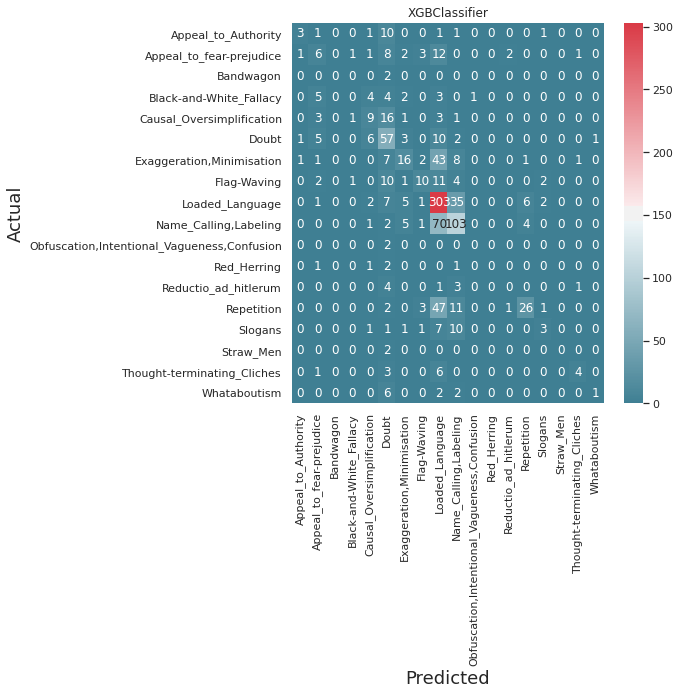

********************************************************************************************************
********************************************************************************************************
LGBMClassifier
Accuracy:  0.5440313111545988
Confusion_matrix:
[[  1   1   0   0   0  11   0   1   3   0   0   0   1   0   0   0   0   0]
 [  1   8   0   1   1  11   2   1  10   1   0   0   0   1   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   5   0   2   2   2   1   0   7   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   5  18   0   0   9   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   4  59   4   0  14   2   0   0   0   0   0   0   0   0]
 [  0   1   0   0   2   2  19   1  40  12   0   0   0   1   1   0   1   0]
 [  0   2   0   1   0   8   3  11   8   7   0   0   0   0   1   0   0   0]
 [  0   1   0   0   2   3   7   1 296  40   0   0   0  10   1   0   1   0]
 [  0   0   0   0   1   0   8   0  67  99   0   0   

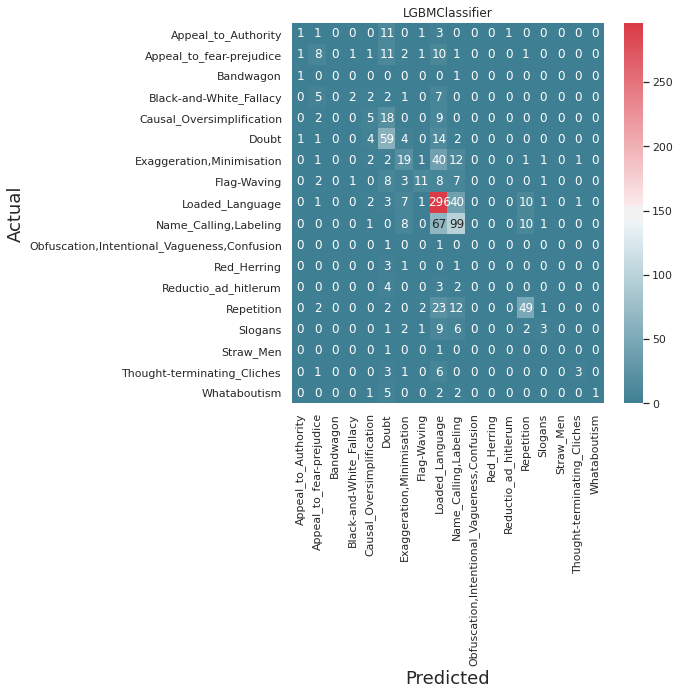

********************************************************************************************************
********************************************************************************************************
ExtraTreesClassifier
Accuracy:  0.5459882583170255
Confusion_matrix:
[[  0   2   0   0   0  13   0   0   3   0   0   0   0   0   0   0   0   0]
 [  1   2   0   1   0  20   1   0  10   1   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   2   1   9   1   0   5   0   0   0   0   0   0   0   0   0]
 [  0   1   0   1   4  23   1   0   4   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0  71   0   0   9   4   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   4  18   1  40  12   0   0   0   1   1   0   1   0]
 [  0   2   0   0   1  10   0  11  13   3   0   0   0   1   0   0   0   0]
 [  0   2   0   0   0   6   7   0 291  46   0   0   0   8   1   0   1   0]
 [  0   0   0   0   0   1   6   0  72  94   0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


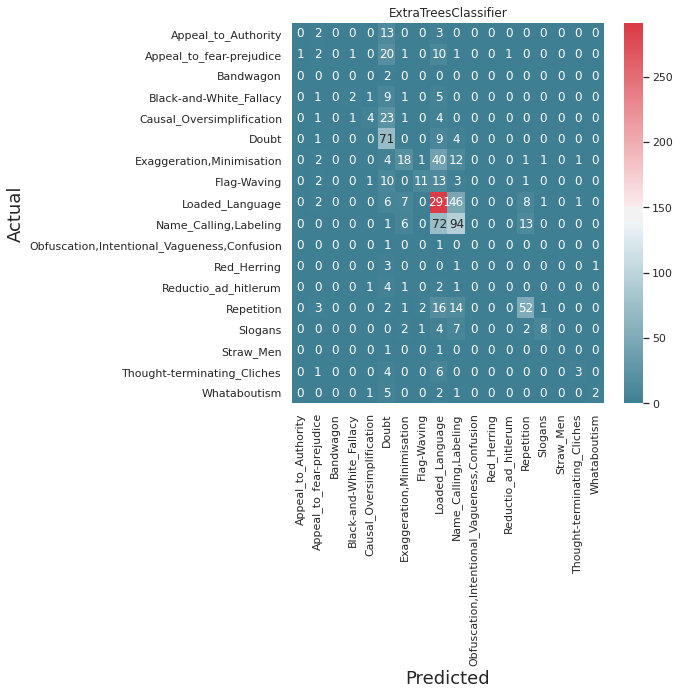

********************************************************************************************************
********************************************************************************************************
ExtraTreeClassifier
Accuracy:  0.4227005870841487
Confusion_matrix:
[[  4   2   0   0   1   5   0   0   1   1   0   1   0   0   1   0   1   1]
 [  2   2   0   2   3  11   5   1   4   0   1   1   2   0   1   0   1   1]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   3   0   0   1   2   2   2   5   1   0   0   0   0   0   0   1   1]
 [  2   2   0   4   6   8   1   2   4   1   0   1   0   1   0   0   1   1]
 [  7   4   0   1   4  35   5   4  10   7   1   0   1   0   0   1   2   3]
 [  1   1   0   1   2   4  20   2  21  15   0   0   0   6   2   0   4   1]
 [  2   5   0   2   4   3   2   9   5   3   0   0   1   1   4   0   0   0]
 [  0   6   0   0   5   8  21   6 214  66   0   0   0  25   6   0   4   1]
 [  2   3   0   1   2   7  14   4  53  79   0  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


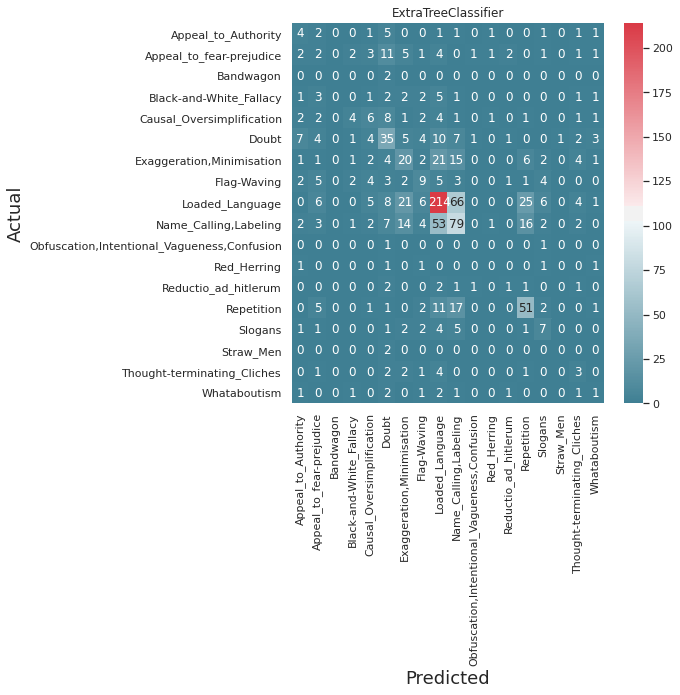

********************************************************************************************************
********************************************************************************************************
DecisionTreeClassifier
Accuracy:  0.41487279843444225
Confusion_matrix:
[[  0   1   0   2   4   4   2   2   2   0   0   0   0   0   1   0   0   0]
 [  4   5   0   3   2   2   2   2   9   1   0   0   1   2   0   1   0   3]
 [  1   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   3   0   4   2   2   3   0   1   1   0   0   1   0   1   0   0   0]
 [  2   6   0   3   5  10   1   3   3   0   0   0   1   0   0   0   0   0]
 [  5   9   0   3  12  29   5   2   7   7   0   1   1   0   2   1   0   1]
 [  1   5   0   1   1   8  15   1  29   9   1   0   1   1   3   1   2   1]
 [  1   4   0   2   2   2   4  10   5   5   0   0   1   2   1   1   1   0]
 [  1   3   0   1   1   2  19   4 220  71   1   0   1  24   7   1   3   3]
 [  0   2   0   1   1   1  15   2  59  81  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


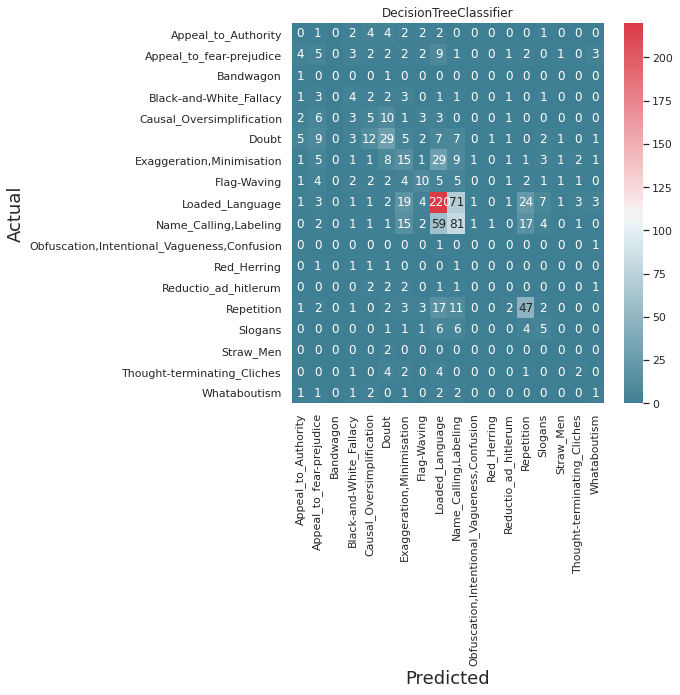

********************************************************************************************************
********************************************************************************************************
GradientBoostingClassifier
Accuracy:  0.5469667318982387
Confusion_matrix:
[[  2   4   0   0   0   8   0   0   1   1   0   0   1   0   0   1   0   0]
 [  2   8   0   1   1  11   2   0  11   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   7   0   1   1   0   4   0   3   0   0   0   1   0   1   0   0   1]
 [  0   4   0   1  13  10   0   0   3   0   0   0   1   0   1   0   0   1]
 [  3   3   0   1   9  49   3   0   9   1   0   1   0   0   0   0   1   5]
 [  1   2   0   0   1   7  22   1  30   9   0   0   1   2   2   1   1   0]
 [  0   1   0   2   1   9   3  12   6   4   1   0   0   0   2   0   0   0]
 [  0   5   0   0   1   2   6   2 301  34   0   2   1   7   0   0   1   0]
 [  1   0   0   0   0   0   5   3  70 10

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


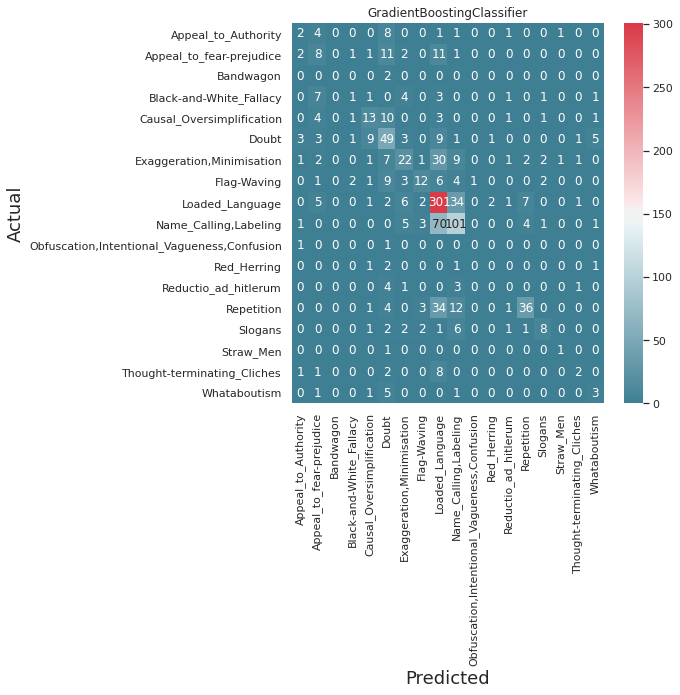

********************************************************************************************************
********************************************************************************************************
AdaBoostClassifier
Accuracy:  0.3953033268101761
Confusion_matrix:
[[  0   0   0   0   0  16   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  28   0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  17   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   1  30   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  73   0   0  12   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  25   2   0  53   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  19   0   0  19   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  30   2   0 323   6   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0  15   0   0 167   4   0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


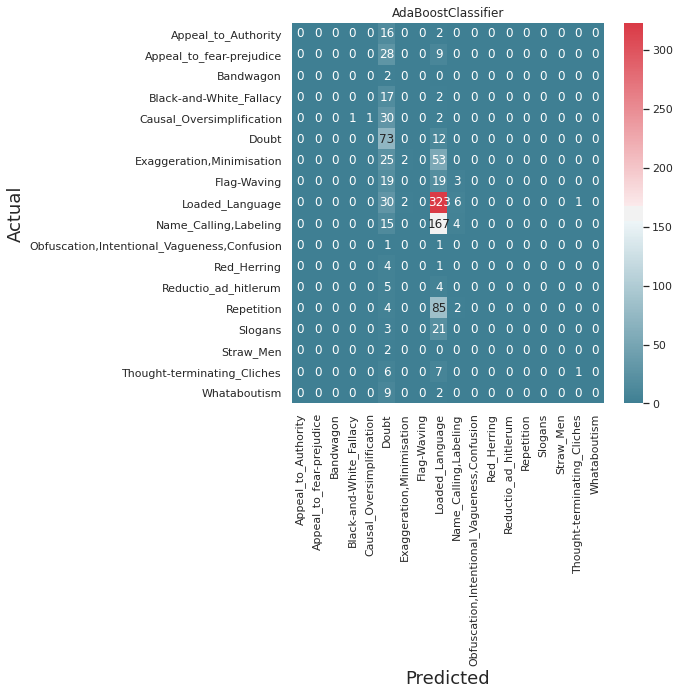

********************************************************************************************************
********************************************************************************************************
RandomForestClassifier
Accuracy:  0.5518590998043053
Confusion_matrix:
[[  0   1   0   0   0  14   0   0   2   1   0   0   0   0   0   0   0   0]
 [  1   3   0   1   0  19   1   0  11   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   1   1   9   1   0   5   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   3  25   0   0   5   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0  67   1   0  11   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   8  17   1  39  12   0   0   0   2   0   0   1   0]
 [  0   2   0   0   1  10   1  11  12   3   0   0   0   1   0   0   0   0]
 [  0   1   0   0   0   6   3   0 305  40   0   0   0   6   0   0   1   0]
 [  0   0   0   0   0   1   4   0  74  98   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


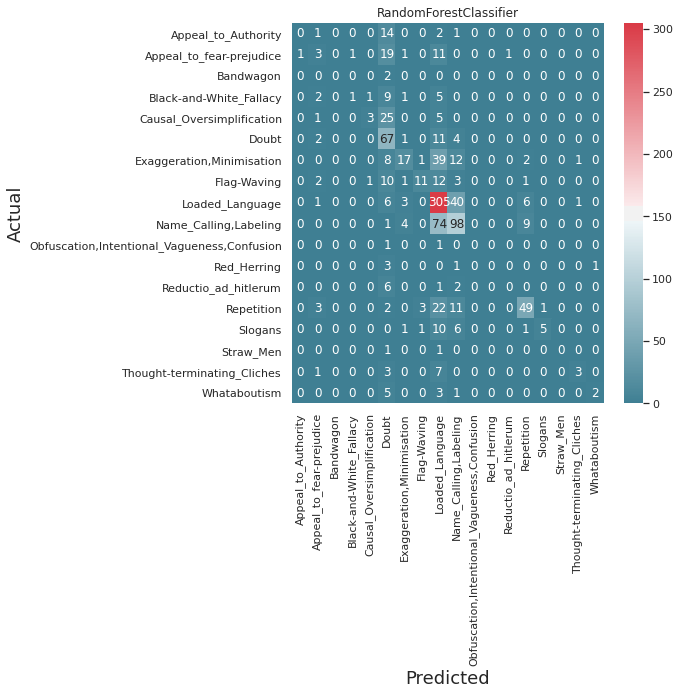

********************************************************************************************************


In [146]:
accuracies =[]
f1scores=[]

for clf in clfs:
    path = '/content/drive/My Drive/Colab Notebooks/TextAnalytics/multiClass results/',clf.__class__.__name__,'confusion_matrix'
    try:
      accuracy, f1score = computeScores(clf, x_train, y_train, x_test, y_test)
      accuracies.append(accuracy)
      f1scores.append(f1score)
    except AttributeError as e:
      print(e)

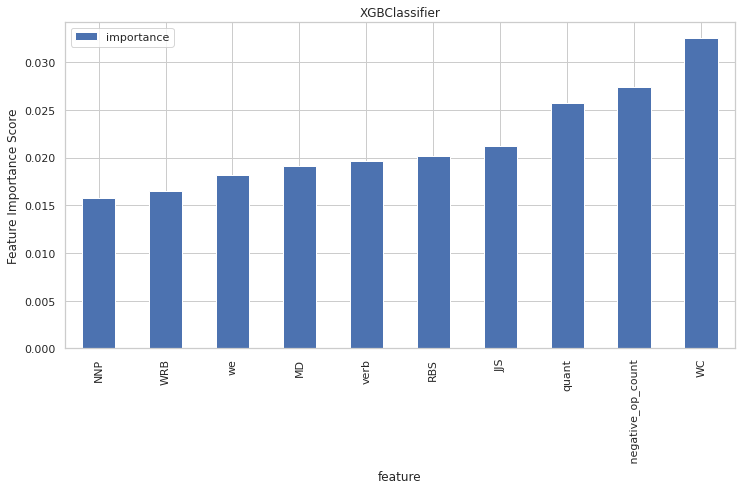

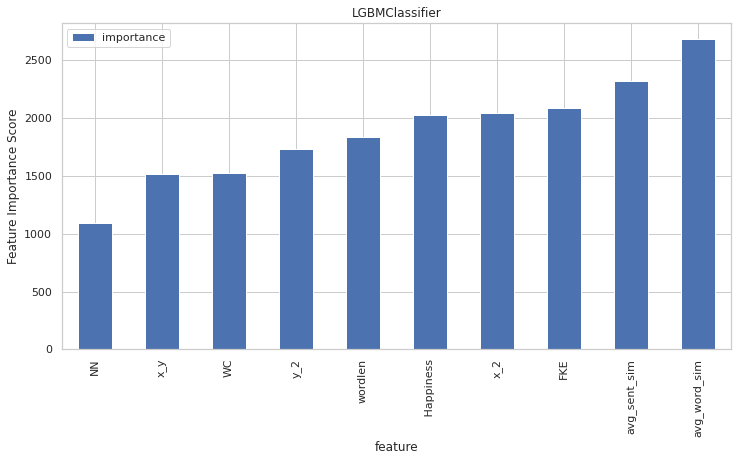

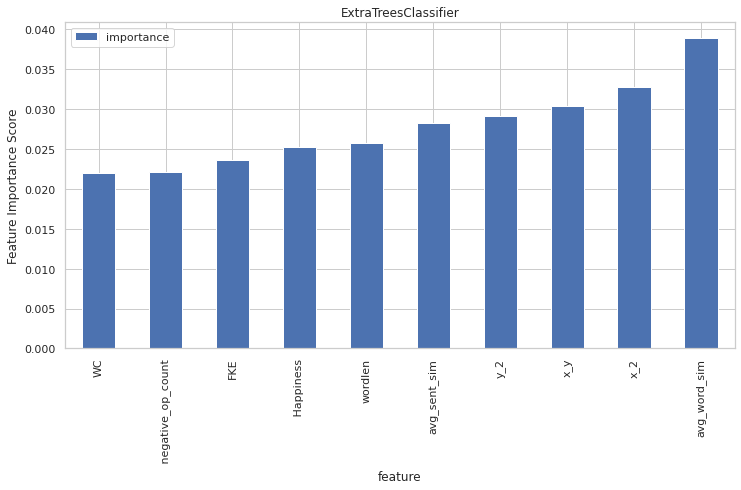

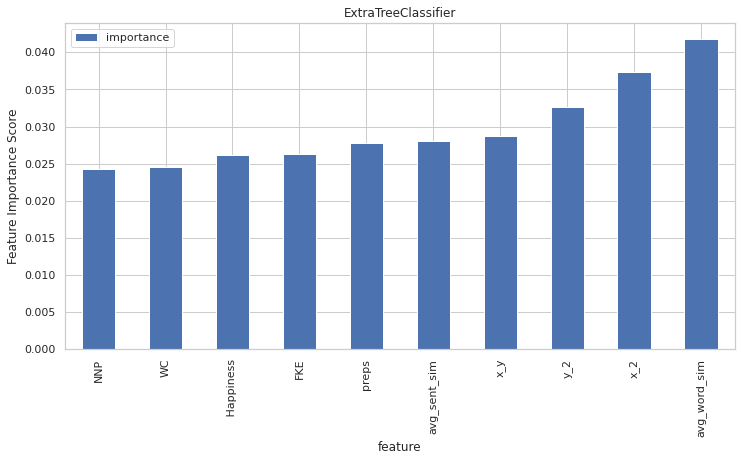

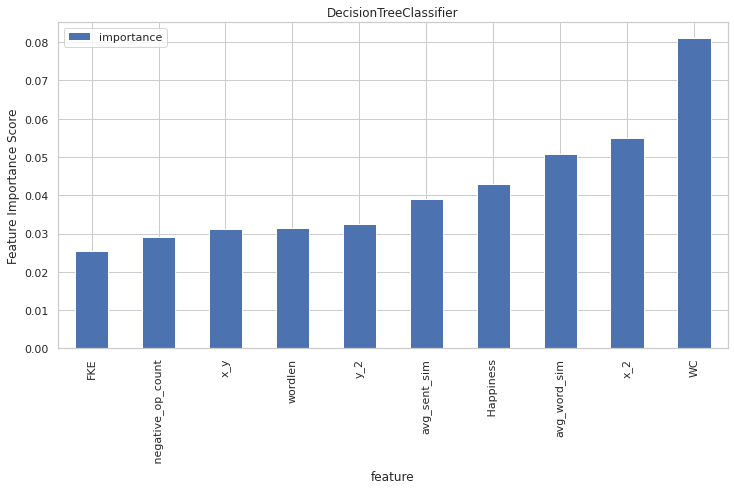

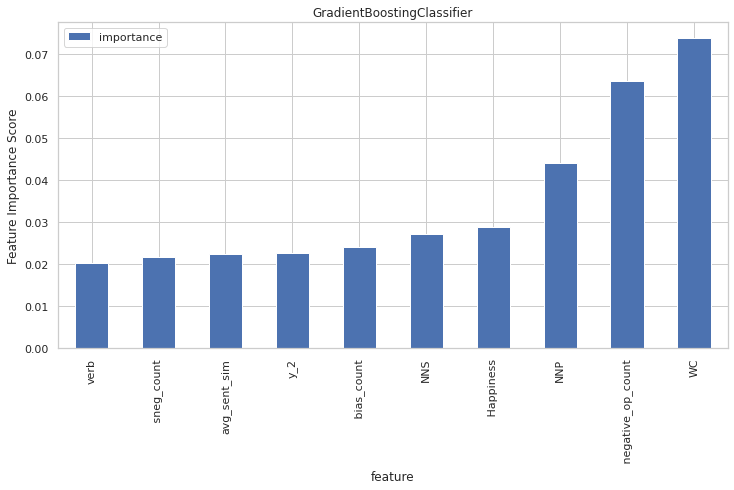

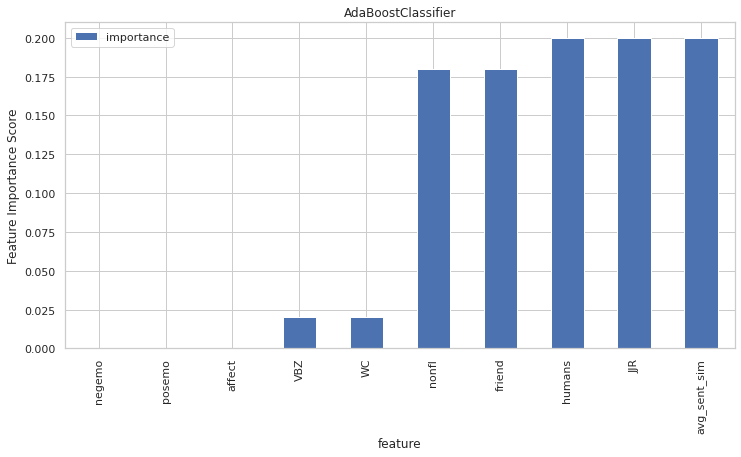

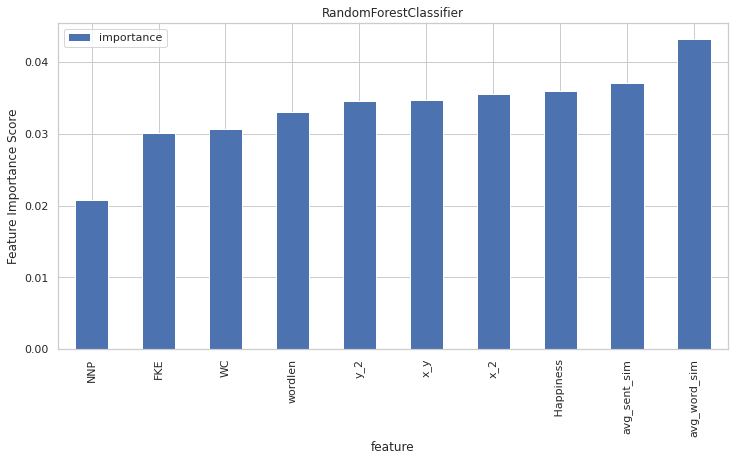

In [147]:
for clf in clfs:
    try:
      _ = plot_feature_importances(clf, x_train, y_train, top_n= 10, title=clf.__class__.__name__)
      # accuracies.append(accuracy)
      # f1scores.append(f1score)
    except AttributeError as e:
      print(e)

In [0]:
x_updated = x[[' negative_op_count', 'avg_word_sim', 'vad_neu', 'x_y', 'avg_sent_sim', 'SMOG', ' Happiness', 'y_2', 'x_2']]

In [0]:
clfs_name=[]
for clf in clfs:
  clfs_name.append(clf.__class__.__name__)

In [98]:
clfs_name

['XGBClassifier',
 'LGBMClassifier',
 'ExtraTreesClassifier',
 'ExtraTreeClassifier',
 'DecisionTreeClassifier',
 'GradientBoostingClassifier',
 'AdaBoostClassifier',
 'RandomForestClassifier']

In [99]:
accuracies

[0.5293542074363993,
 0.5440313111545988,
 0.5420743639921722,
 0.38747553816046965,
 0.4295499021526419,
 0.5322896281800391,
 0.3953033268101761,
 0.5518590998043053]

In [0]:
result = {}
result['Accuracy'] = accuracies
result['Classifier'] = clfs_name

In [0]:
df_result = pd.DataFrame.from_dict(result)

In [102]:
df_result.head()

,Accuracy,Classifier
0,0.529354,XGBClassifier
1,0.544031,LGBMClassifier
2,0.542074,ExtraTreesClassifier
3,0.387476,ExtraTreeClassifier
4,0.429550,DecisionTreeClassifier


In [103]:
df_result.sort_values("Accuracy")

,Accuracy,Classifier
3,0.387476,ExtraTreeClassifier
6,0.395303,AdaBoostClassifier
4,0.429550,DecisionTreeClassifier
0,0.529354,XGBClassifier
5,0.532290,GradientBoostingClassifier
2,0.542074,ExtraTreesClassifier
1,0.544031,LGBMClassifier
7,0.551859,RandomForestClassifier


In [0]:
df_result.reset_index(drop=True, inplace=True)

In [105]:
df_result.head()

,Accuracy,Classifier
0,0.529354,XGBClassifier
1,0.544031,LGBMClassifier
2,0.542074,ExtraTreesClassifier
3,0.387476,ExtraTreeClassifier
4,0.429550,DecisionTreeClassifier


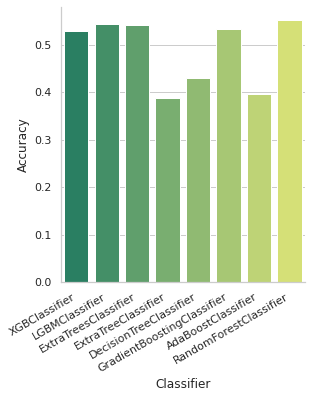

In [106]:
g = sns.catplot(x="Classifier", y="Accuracy",kind='bar', data=df_result, palette='summer')
g.fig.autofmt_xdate()

# g = sns.barplot(x="Classifier", y="Accuracy", data=df_result, palette='summer')
# g.fig.autofmt_xdate()

In [107]:
df_result.head()

,Accuracy,Classifier
0,0.529354,XGBClassifier
1,0.544031,LGBMClassifier
2,0.542074,ExtraTreesClassifier
3,0.387476,ExtraTreeClassifier
4,0.429550,DecisionTreeClassifier


In [0]:
x_updated = x[['avg_sent_sim', 'x_y', 'y_2', 'FKE','vad_neu', ' negative_op_count','x_2','avg_word_sim',' Happiness', 'SMOG']]

In [109]:
x_updated.head()

,avg_sent_sim,x_y,y_2,FKE,vad_neu,negative_op_count,x_2,avg_word_sim,Happiness,SMOG
0,0.5215,0.041495,0.330348,18.4200,0.577,0.000000,0.064896,0.065506,5.165000,3.000000
1,0.5215,0.215306,0.330348,6.7271,0.588,0.071429,1.676765,0.339890,5.694545,8.477226
2,0.5215,1.084657,0.330348,8.7900,0.250,0.000000,14.397043,1.712280,4.400000,3.000000
3,0.5215,0.455696,0.330348,0.5000,0.699,0.076923,0.000000,0.719379,5.105000,3.000000
4,0.5215,0.576979,0.330348,8.5415,0.636,0.133333,0.000000,0.910841,5.050000,8.477226


In [0]:
x_train_updated, x_test_updated, y_train_updated, y_test_updated = model_selection.train_test_split(x_updated, y, test_size=0.2,random_state = 42, stratify = y)

********************************************************************************************************
XGBClassifier
Accuracy:  0.4197651663405088
Confusion_matrix:
[[  0   0   0   0   1   9   1   0   4   2   0   1   0   0   0   0   0   0]
 [  0   2   0   2   1  11   1   0  17   1   0   0   1   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   5   0   2   1   3   1   0   5   0   2   0   0   0   0   0   0   0]
 [  1   1   0   1   1  15   2   0  11   2   0   0   0   0   0   0   0   0]
 [  4   3   0   0   1  45   3   0  25   3   0   0   0   1   0   0   0   0]
 [  0   1   0   0   0   9   4   0  50  12   0   0   1   1   1   0   0   1]
 [  0   3   0   0   0   4   1  10  16   5   0   0   0   2   0   0   0   0]
 [  0   2   0   0   0   4   2   4 307  35   0   0   0   7   0   0   1   0]
 [  0   0   0   0   0   8   2   2 139  31   0   0   0   4   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


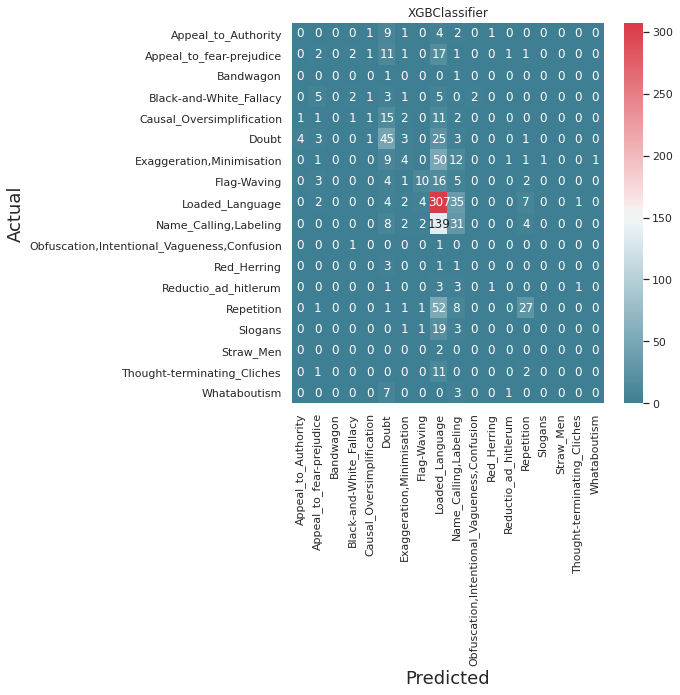

********************************************************************************************************
********************************************************************************************************
LGBMClassifier
Accuracy:  0.43737769080234834
Confusion_matrix:
[[  1   0   0   0   4   5   2   0   3   3   0   0   0   0   0   0   0   0]
 [  1   3   0   1   2  12   3   0  10   2   0   0   0   2   1   0   0   0]
 [  1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   3   0   2   3   3   1   0   7   0   0   0   0   0   0   0   0   0]
 [  0   4   0   1   4  13   4   0   5   3   0   0   0   0   0   0   0   0]
 [  3   4   0   1   7  37   5   0  24   3   0   0   0   1   0   0   0   0]
 [  0   0   0   0   2   9  10   2  42  12   0   0   0   2   1   0   0   0]
 [  0   3   0   0   1   3   2  12  14   4   0   0   0   2   0   0   0   0]
 [  0   3   0   0   1   4   7   3 286  51   0   0   0   7   0   0   0   0]
 [  0   1   0   1   2   6   6   0 117  46   0   0  

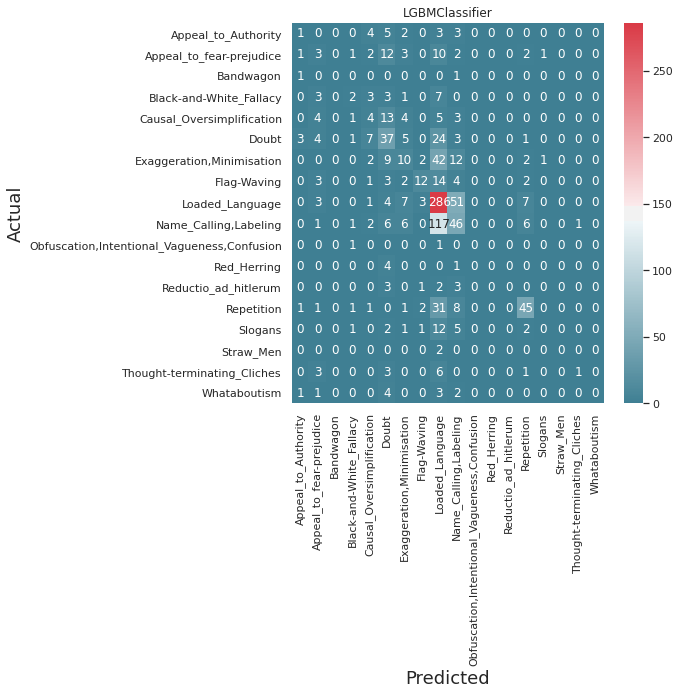

********************************************************************************************************
********************************************************************************************************
ExtraTreesClassifier
Accuracy:  0.4500978473581213
Confusion_matrix:
[[  0   1   0   1   0   7   1   0   4   4   0   0   0   0   0   0   0   0]
 [  1   4   0   2   2  10   2   0  11   4   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   3   0   4   2   4   1   0   4   0   1   0   0   0   0   0   0   0]
 [  0   1   0   1   5  12   4   1   8   1   0   0   0   0   0   0   0   1]
 [  2   4   0   1   6  43   3   1  19   4   0   0   0   0   0   1   0   1]
 [  1   1   0   1   1   9  11   2  32  19   0   0   0   3   0   0   0   0]
 [  0   3   0   0   1   5   2  10  11   8   0   0   0   1   0   0   0   0]
 [  1   3   0   0   0   7   9   3 270  49   0   0   0  18   0   0   2   0]
 [  0   1   0   0   1   7   7   1  99  59   0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


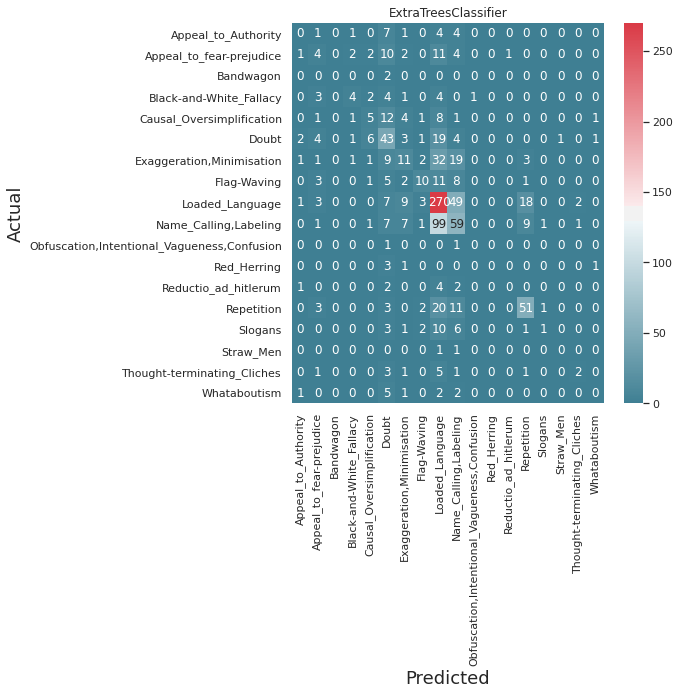

********************************************************************************************************
********************************************************************************************************
ExtraTreeClassifier
Accuracy:  0.3493150684931507
Confusion_matrix:
[[  2   1   0   1   2   1   1   0   7   1   0   1   0   0   0   0   0   1]
 [  3   4   1   3   4   3   3   1   6   5   1   0   1   1   0   0   0   1]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   1   1   0   1   0   3   4   2   2   0   1   2   0   0   1   0]
 [  3   1   0   2   1   7   8   1   8   1   1   0   0   0   0   0   0   1]
 [  3   5   0   2   7  33   5   4  11  10   0   0   2   1   0   1   0   1]
 [  1   0   1   0   8  10   9   3  21  23   0   1   0   2   0   0   1   0]
 [  0   4   1   1   2   1   6   7   7   6   0   0   0   4   1   0   1   0]
 [  1   8   1   4   7  16  18  11 183  70   0   1   2  28   9   0   1   2]
 [  1   4   1   1   1   9  11   8  52  69   1  

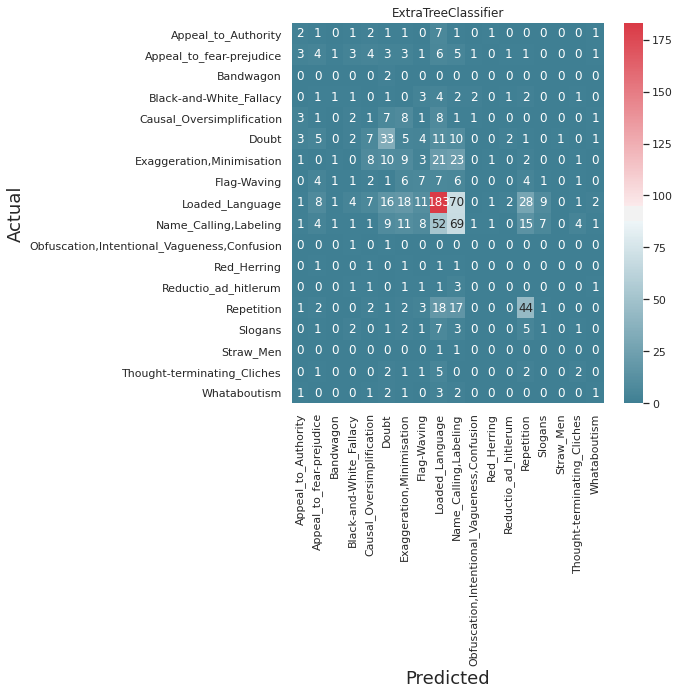

********************************************************************************************************
********************************************************************************************************
DecisionTreeClassifier
Accuracy:  0.3219178082191781
Confusion_matrix:
[[  2   2   0   2   0   2   1   1   2   3   0   0   2   1   0   0   0   0]
 [  1   7   0   4   2   6   4   0   7   4   0   1   0   1   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  1   4   0   1   2   1   3   1   2   1   1   1   1   0   0   0   0   0]
 [  1   1   0   4   4  11   3   1   3   2   0   0   2   0   0   0   0   2]
 [  2   4   0   1  10  25   5   6  15  11   0   1   1   2   0   1   1   0]
 [  0   3   0   3   5   9  13   4  21  12   0   2   0   5   1   0   1   1]
 [  3   2   1   0   2   2   5  10   9   4   0   0   0   1   2   0   0   0]
 [  1   7   1   2   1  12  32   9 174  76   1   2   1  35   5   0   2   1]
 [  0   4   0   0   1  10  22   0  79  51   

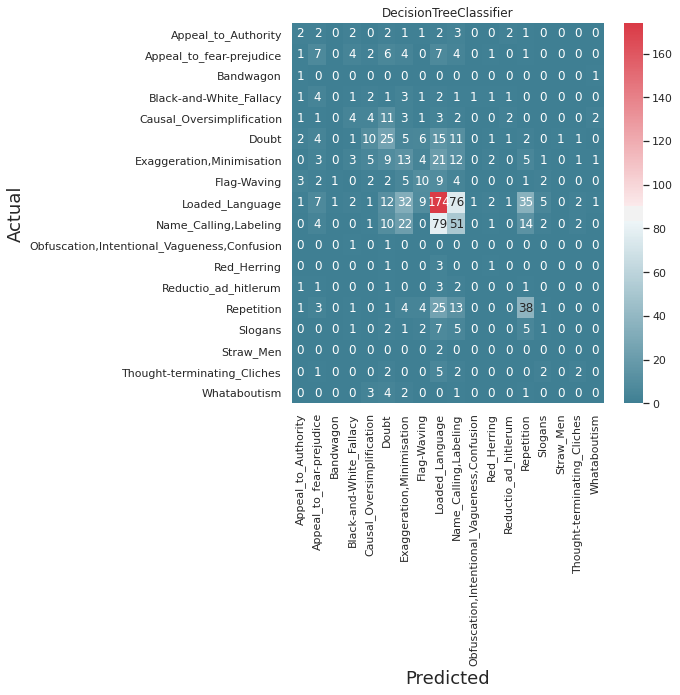

********************************************************************************************************
********************************************************************************************************
GradientBoostingClassifier
Accuracy:  0.42367906066536204
Confusion_matrix:
[[  2   2   0   0   1   6   1   0   4   2   0   0   0   0   0   0   0   0]
 [  2   5   0   2   1   5   3   0  15   2   0   0   1   1   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   2   0   3   3   4   1   0   4   0   0   0   1   0   0   0   0   1]
 [  1   5   1   1   4   8   4   0   6   2   0   0   1   0   1   0   0   0]
 [  5   2   0   2   5  34   5   1  25   3   0   2   0   0   0   0   1   0]
 [  0   2   0   0   4   8   7   2  48   7   0   1   0   1   0   0   0   0]
 [  0   0   0   1   3   3   3  10  13   7   0   0   0   1   0   0   0   0]
 [  0   4   0   1   0   4   7   3 292  40   0   0   1   4   0   0   4   2]
 [  0   1   0   0   0   7   5   2 127  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


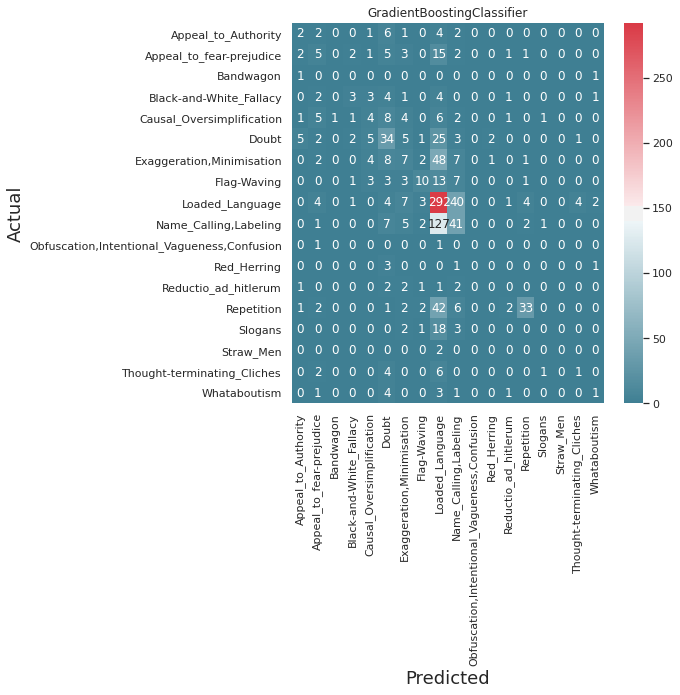

********************************************************************************************************
********************************************************************************************************
AdaBoostClassifier
Accuracy:  0.2984344422700587
Confusion_matrix:
[[  0   0   0   2   0  13   0   0   2   0   0   0   0   0   0   1   0   0]
 [  0   0   0   3   0  15   0   0  16   0   0   0   0   1   0   2   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   6   0   5   0   0   6   0   0   0   0   0   0   2   0   0]
 [  0   0   0   5   0  19   0   0   8   0   0   0   0   0   0   2   0   0]
 [  0   0   0  10   0  45   1   0  24   0   0   0   0   0   0   5   0   0]
 [  0   0   2  10   0  23   0   0  32   0   0   0   0   0   0  13   0   0]
 [  0   0   0   2   0   9   0   0  15   0   0   0   0   1   0  14   0   0]
 [  0   0   3  37   0  17   0   0 236   0   0   0   0  24   0  45   0   0]
 [  0   0   2  28   0  19   1   0 101   0   0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


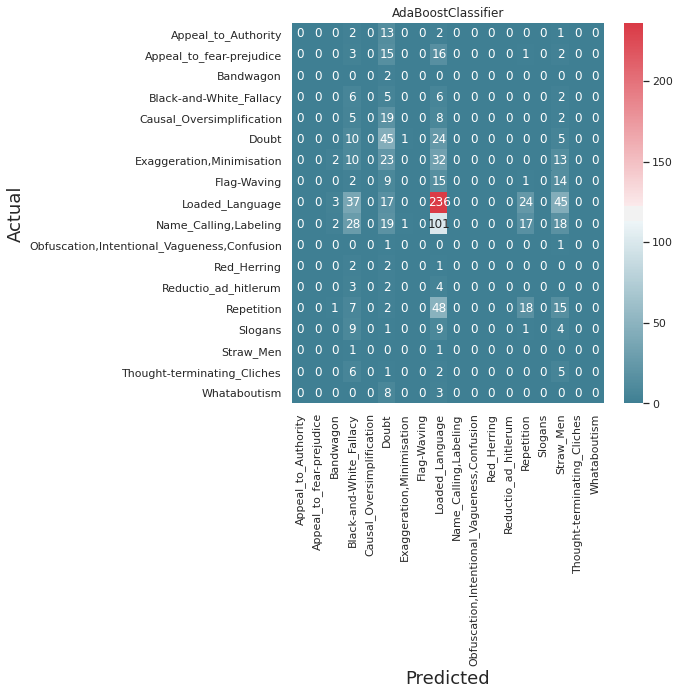

********************************************************************************************************
********************************************************************************************************
RandomForestClassifier
Accuracy:  0.44227005870841485
Confusion_matrix:
[[  0   0   0   0   2   7   1   0   3   5   0   0   0   0   0   0   0   0]
 [  1   3   0   2   2  11   1   0  13   1   0   0   1   2   0   0   0   0]
 [  1   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   4   0   2   3   4   0   0   3   2   1   0   0   0   0   0   0   0]
 [  1   1   0   3   3  13   3   1   7   2   0   0   0   0   0   0   0   0]
 [  1   3   0   1   4  40   3   1  27   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   8  10   3  43  12   0   0   0   2   0   0   0   0]
 [  0   2   0   0   1   6   2  10  13   5   0   0   0   2   0   0   0   0]
 [  0   1   0   0   0   7   5   4 291  43   0   0   0  11   0   0   0   0]
 [  0   1   0   0   1   6   5   1 117  46  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


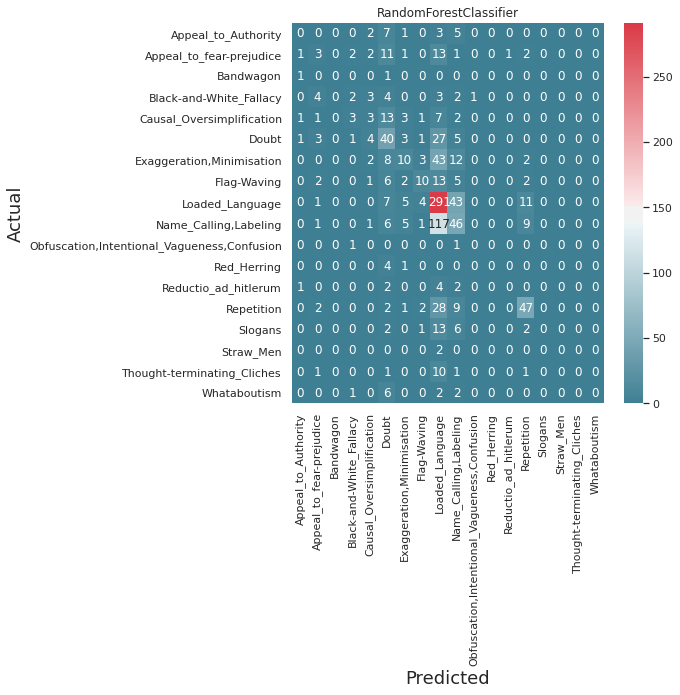

********************************************************************************************************


In [111]:
accuracies_updated =[]
f1scores_updated=[]
for clf in clfs:
    path = '/content/drive/My Drive/Colab Notebooks/TextAnalytics/multiClass results/',clf.__class__.__name__,'confusion_matrix'
    try:
      accuracy, f1score = computeScores(clf, x_train_updated, y_train_updated, x_test_updated, y_test_updated)
      accuracies_updated.append(accuracy)
      f1scores_updated.append(f1score)
    except AttributeError as e:
      print(e)

In [0]:
combined = {}
combined['Classifier'] = []
combined['Accuracy'] = []
# combined['F1 Score'] = []
combined['Features'] = []

for i in range(len(accuracies)):
  combined['Classifier'].append(clf_names[i])
  combined['Accuracy'].append(accuracies[i])
  # combined['F1 Score'].append(f1scores[i])
  combined['Features'].append('All Features')

  combined['Classifier'].append(clf_names[i])
  combined['Accuracy'].append(accuracies_updated[i])
  # combined['F1 Score'].append(f1scores_updated[i])
  combined['Features'].append('Top Contributing Features')


In [113]:
df_comparison = pd.DataFrame.from_dict(combined)
df_comparison

,Classifier,Accuracy,Features
0,XGBClassifier,0.529354,All Features
1,XGBClassifier,0.419765,Top Contributing Features
2,LGBMClassifier,0.544031,All Features
3,LGBMClassifier,0.437378,Top Contributing Features
4,ExtraTreesClassifier,0.542074,All Features
5,ExtraTreesClassifier,0.450098,Top Contributing Features
6,ExtraTreeClassifier,0.387476,All Features
7,ExtraTreeClassifier,0.349315,Top Contributing Features
8,DecisionTreeClassifier,0.429550,All Features
9,DecisionTreeClassifier,0.321918,Top Contributing Features


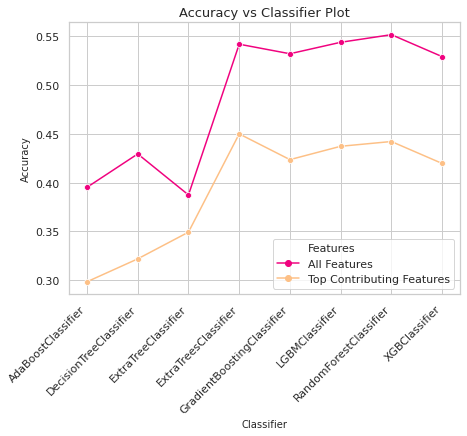

In [114]:
plt.figure(figsize = (7,5))
sns.set(style='whitegrid',)
sns.lineplot(x="Classifier", y="Accuracy", data = df_comparison, hue = "Features",style = "Features", palette = "Accent_r", dashes = False, markers = ["o", "o"] )

plt.title("Accuracy vs Classifier Plot", fontsize = 13)
plt.xlabel("Classifier", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light') 
plt.show()

In [116]:
print("Classifier                       Accuracy              AccuracyUpdated")
for i in range(len(clfs)): 
  print(clfs[i].__class__.__name__, "       ",accuracies[i],"       ",accuracies_updated[i] )


Classifier                       Accuracy              AccuracyUpdated
XGBClassifier         0.5293542074363993         0.4197651663405088
LGBMClassifier         0.5440313111545988         0.43737769080234834
ExtraTreesClassifier         0.5420743639921722         0.4500978473581213
ExtraTreeClassifier         0.38747553816046965         0.3493150684931507
DecisionTreeClassifier         0.4295499021526419         0.3219178082191781
GradientBoostingClassifier         0.5322896281800391         0.42367906066536204
AdaBoostClassifier         0.3953033268101761         0.2984344422700587
RandomForestClassifier         0.5518590998043053         0.44227005870841485
